# 5. Modelado de datos

## 5.1. Introducción

Ya hemos visto algunas técnicas cualitativas. Veamos brevemente un resumen de las técnicas cuantitativas que podemos utilizar para entender los datos:

<p align="left">
  <img src="https://www.datocms-assets.com/42764/1664970413-chart-selection-diagram.png" alt="" style="background-color:white"/> <br>
</p>

Tomado de: [Choosing a good chart](https://extremepresentation.typepad.com/blog/2006/09/choosing_a_good.html).



Si bien, las técnicas revisadas nos dan un importante entendimiento de los datos, no son suficientes para poder realizar un análisis más profundo. Para ello, es necesario realizar un proceso de modelado. El modelado de datos es un proceso de análisis de datos que busca descubrir patrones y relaciones entre variables. El modelado de datos es una parte fundamental del análisis de datos y es la base para la construcción de modelos de aprendizaje automático (machine learning).

Primero, entendamos en que campo del conocimiento se encuentra el modelado de datos. El modelado de datos es un proceso que se encuentra en el campo de la estadística. La estadística es una rama de las matemáticas que se encarga de recolectar, organizar, analizar e interpretar datos. Sin embargo, en épocas más recientes se ha desarrollado un campo de conocimiento que se encarga de realizar análisis de datos a gran escala. Este campo de conocimiento es el análisis de datos (data analytics). El cual es un proceso que se encarga de recolectar, organizar, analizar e interpretar datos a gran escala. El análisis de datos es un proceso que se encuentra en el campo de la ciencia de datos (data science). La ciencia de datos es un campo de conocimiento que se encarga de recolectar, organizar, analizar e interpretar datos a gran escala utilizando técnicas de estadística, matemáticas, programación y visualización de datos.

<p align="left">
  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*mgXvzNcwfpnBawI6XTkVRg.png" alt=""  width="400"/> <br>
</p>

Tomado de: [Medium](https://senendu5.medium.com/getting-into-data-science-687731828bb).


¿Qué es un modelo?

Un modelo es una forma de representar la realidad. También se suele decir que un modelo es una abstracción de la realidad, una representación simplificada de la realidad o una representación de la realidad que nos permite entenderla mejor y predecir lo que pasará.


<p align="left">
  <img src="https://www.lacan.upc.edu/admoreWeb/wp-content/uploads/2018/04/test2.jpg" alt=""  width="400" /> <br>
</p>


### Algunos ejemplos de modelos.

Uno de los modelos más simples que podemos encontrar es el del tiro parabólico:

<p align="left">
  <img src="https://www.neurochispas.com/wp-content/uploads/2023/06/Formula-para-el-rango-en-movimiento-parabolico.png" alt=""  width="400" /> <br>
</p>

Si ponemos algunas de estas variables en un modelo matemático, obtenemos la siguiente ecuación:

$$y = ax^2 + bx + c$$

- Donde $y$ es la altura, $x$ es la distancia y $a$, $b$ y $c$ son constantes.
- En éste caso, tanto $x$ como $y$ se les conoce como variables y $a$, $b$ y $c$ como parámetros.
- Éste tipo de modelos se los conoce como modelos matemáticos.

Por otro lado, tenemos modelos estocásticos o estadísticos. Un clásico ejemplo es el modelo de regresión lineal.

Datos: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data  
(Por ahora no nos preocupemos por el código)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder

sns.set()

In [2]:
# leer datos
df = pd.read_csv('https://raw.githubusercontent.com/alejo-acosta/pmdb-material/master/data/house-train.csv')

# variables categóricas y numéricas
cat_vars = [i for i in df.columns if i not in df._get_numeric_data().columns]
num_vars = [i for i in df.columns if i not in cat_vars]

# eliminar outliers
lista_variables_outliers = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',]
df = df[(np.abs(stats.zscore(df[lista_variables_outliers])) < 3).all(axis=1)]
df.shape

(1420, 81)

In [3]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.009621,-0.021551,-0.038818,-0.029113,0.012741,-0.017785,-0.020428,-0.060695,-0.017975,...,-0.040320,-0.006093,0.013044,-0.047429,0.008419,0.058125,-0.007117,0.026235,0.001594,-0.028339
MSSubClass,0.009621,1.000000,-0.416096,-0.149659,0.047990,-0.070054,0.042037,0.045069,0.039232,-0.067868,...,-0.014463,-0.002367,-0.013658,-0.044716,-0.028726,0.003860,-0.007569,-0.011168,-0.016375,-0.083061
LotFrontage,-0.021551,-0.416096,1.000000,0.388814,0.200827,-0.047492,0.114217,0.068135,0.145392,0.119650,...,0.073115,0.107991,-0.009496,0.080022,0.045194,0.019435,0.003201,0.030580,0.012295,0.359398
LotArea,-0.038818,-0.149659,0.388814,1.000000,0.068681,0.001046,0.002335,-0.003509,0.052459,0.159139,...,0.152759,0.057198,-0.021991,0.023672,0.031435,0.021404,0.040562,0.012069,-0.011880,0.258683
OverallQual,-0.029113,0.047990,0.200827,0.068681,1.000000,-0.109772,0.580568,0.540272,0.352730,0.172550,...,0.220549,0.279620,-0.126313,0.038104,0.052519,0.006848,-0.027982,0.078137,-0.023864,0.799280
OverallCond,0.012741,-0.070054,-0.047492,0.001046,-0.109772,1.000000,-0.374825,0.072095,-0.130476,-0.023991,...,-0.002377,-0.033548,0.082156,0.024903,0.042494,0.023986,0.070653,-0.010055,0.049796,-0.087776
YearBuilt,-0.017785,0.042037,0.114217,0.002335,0.580568,-0.374825,1.000000,0.592912,0.299861,0.229749,...,0.219863,0.178678,-0.397671,0.033396,-0.044684,0.003906,-0.033263,0.010397,-0.020457,0.573975
YearRemodAdd,-0.020428,0.045069,0.068135,-0.003509,0.540272,0.072095,0.592912,1.000000,0.150106,0.101205,...,0.199823,0.213640,-0.200636,0.047964,-0.045501,-0.012309,-0.007571,0.022569,0.036678,0.536000
MasVnrArea,-0.060695,0.039232,0.145392,0.052459,0.352730,-0.130476,0.299861,0.150106,1.000000,0.209497,...,0.129064,0.101776,-0.105213,0.027028,0.073498,-0.009980,-0.028369,0.008098,-0.011092,0.411393
BsmtFinSF1,-0.017975,-0.067868,0.119650,0.159139,0.172550,-0.023991,0.229749,0.101205,0.209497,1.000000,...,0.188428,0.055745,-0.117118,0.034551,0.077734,0.004319,0.008649,0.007750,0.014777,0.361936


In [4]:
corr = df[num_vars].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
corr = corr.style.background_gradient(cmap='coolwarm')
corr


,SalePrice
SalePrice,1.000000
OverallQual,0.799280
GrLivArea,0.691209
GarageCars,0.652158
GarageArea,0.639583
TotalBsmtSF,0.617726
1stFlrSF,0.582620
YearBuilt,0.573975
FullBath,0.546787
YearRemodAdd,0.536000


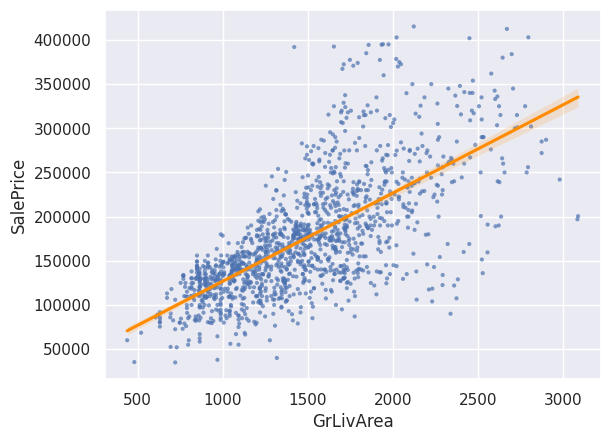

In [5]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.7, 'edgecolor':'none'}, marker='.', line_kws={'color':'darkorange'})
plt.show()

No podemos predecir con exactitud el valor de $y$ a partir de $x$, pero podemos predecir un intervalo de valores en los que se encontrará $y$ con cierta probabilidad. Por ejemplo, podemos decir que con un 95% de probabilidad, dado un valor determinado de $x=1000$, $y$ se encontrará entre $75000 y $125000.

El gráfico es una representación cualitativa del modelo, pero el modelo en sí tomaría la forma de la siguiente ecuación:

$$y = ax + b$$

Donde $y$ es el precio de la vivienda en dólares, $x$ es el área de construcción en pies cuadrados y $a$ y $b$ son las constantes o parámetros del modelo.

<!-- question box -->
<div class="alert alert-block alert-info">
    <b>Pregunta:</b> ¿Cómo se puede interpretar el parámetro a? ¿Cómo se puede interpretar el parámetro b?
</div>

Revisar: https://www.geogebra.org/calculator/pz34cwqh

## 5.2. Modelos de regresión básicos

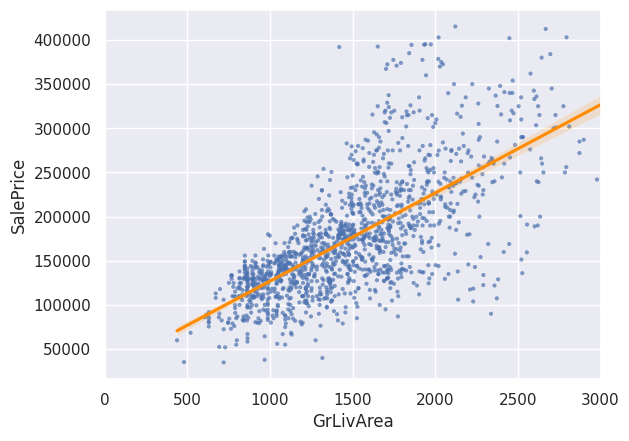

In [6]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.7, 'edgecolor':'none'}, marker='.', line_kws={'color':'darkorange'})
plt.xlim(0, 3000)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = df[['GrLivArea']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Intercept: ', lr.intercept_)
print('Coef: ', lr.coef_)


Intercept:  25506.75033248376
Coef:  [101.46531224]


$Precio = 100 [\frac{USD}{Área}] * Metros\_cuadrados [Área] + 27000[USD]$

<!-- question box -->
<div class="alert alert-block alert-info">
    <b>Pregunta:</b> ¿En promedio, cuánto costaría una vivienda de 2000 metros cuadrados?
</div>

La más simple:

$$y = ax + b$$

La regresión lineal, no necesariamente tiene que tener una sola variable independiente. Puede tener más de una variable independiente. Por ejemplo, podemos tener un modelo de regresión lineal con dos variables independientes:

$$y = ax_1 + bx_2 + c$$

Además, las variables independiente pueden tener ciertas transformaciones. Por ejemplo, podemos tener un modelo de regresión lineal con una variable independiente que es el cuadrado de otra variable independiente:

$$y = ax_1^2 + bx_1 + cx_2 + d$$

<p align="left">
  <img src="https://taxfoundation.org/wp-content/uploads/2019/03/PaF-Chart-121.png" alt="" style="background-color:white"  width="700"/> <br>
</p>

Tomado de: [Tax Foundation](https://taxfoundation.org/data/all/federal/average-income-age/).

> ¿Qué ecuación matemática podría representar el gráfico anterior?

(1) $$y = ax^2 + bx + c$$
(2) $$y = bx + c$$


In [8]:

def plot_order(order=1, fit_reg=False, extended=False):
    x = np.linspace(0, 20, 19)
    def func(x):
        return x*np.sin(x)+x
    y = func(x)
    import warnings
    params = {'scatter_kws':{'alpha':1, 'edgecolor':'none'}, 
              'marker':'o', 'line_kws':{'color':'darkorange'}, 
              'ci':0, 'x':x, 'y':y}
    warnings.filterwarnings('ignore')
    fit = np.polyfit(x, y, order)
    fit_fn = np.poly1d(fit)
    if extended: xline = np.linspace(-5,25,100)
    else:        xline = np.linspace(0,20,100)
    fig = plt.figure(figsize=(8, 5))
    if fit_reg:
        plt.plot(x, y, 'bo', xline, fit_fn(xline), '--r')
    sns.regplot(order=order, **params, fit_reg=False)
    plt.axvspan(-1, 21, color='grey', alpha=0.2)
    plt.xlim(-5, 25)
    plt.ylim(-10, 50)
    plt.show()

In [9]:
from ipywidgets import interact
interact(plot_order, order=(1, 20, 1))
plt.show()

interactive(children=(IntSlider(value=1, description='order', max=20, min=1), Checkbox(value=False, descriptio…

**Overfitting:** es un problema que se presenta cuando el modelo se ajusta demasiado a los datos de entrenamiento. En otras palabras, el modelo se ajusta demasiado a los datos que tiene disponible y no generaliza bien a nuevos datos.

Revisar:
https://www.youtube.com/watch?v=EuBBz3bI-aA

## 5.2.1. Ejemplo regresión lineal

In [10]:
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.799280
GrLivArea,0.691209
GarageCars,0.652158
GarageArea,0.639583
TotalBsmtSF,0.617726
1stFlrSF,0.582620
YearBuilt,0.573975
FullBath,0.546787
YearRemodAdd,0.536000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = df[['GrLivArea']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


El modelo teórico sería de la siguiente forma:

$$y = ax_1 + bx_2 + c$$

Lo que buscamos son los parámetros $a$, $b$ y $c$. Donde $a$ es el coeficiente de la variable $x_1$, $b$ es el coeficiente de la variable $x_2$ y $c$ es el intercepto.

Para ello, utilizaremos el método de mínimos cuadrados. El método de mínimos cuadrados es un método que busca minimizar la suma de los errores al cuadrado. En otras palabras, busca minimizar la suma de las diferencias entre los valores reales y los valores predichos al cuadrado.

In [12]:
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

LinearRegression()

Podemos obtener un score de nuestro modelo, que indica que tan bien se ajusta a un set de datos. En éste caso siempre se debe obtener el score frente a los datos de prueba (test data).

In [13]:
modelo_rl.score(X_test, y_test)

0.46011963176263837

Para obtener el intercepto y los coeficientes del modelo:

In [14]:
modelo_rl.intercept_

25506.75033248376

In [15]:
modelo_rl.coef_

array([101.46531224])

Podemos hacer predicciones del modelo utilizando el método predict para comparar el valor predicho con el valor real.

In [16]:
pred = modelo_rl.predict(X_test)

In [17]:
y_test_df = pd.DataFrame(y_test)
y_test_df['pred'] = pred

y_test_df

,SalePrice,pred
51,114500,144829.957532
295,142500,127276.458514
700,312500,208144.312373
1033,230000,193330.376785
377,340000,275720.210328
...,...,...
1328,256000,308797.902120
360,156000,118043.115100
1337,52500,95822.211718
1450,136000,207332.589875


También podemos ingresar valores de cada variable independiente para obtener un valor predicho.

In [18]:
modelo_rl.predict([[2000]])

array([228437.374822])

## 5.2.2. Variables categóricas

Es una variable que puede tomar un número limitado de valores. Por ejemplo, el género de una persona puede ser masculino o femenino. Otra variable categórica puede ser el color de un auto, el cual puede ser rojo, azul o verde.

Las variables categóricas se pueden dividir en dos tipos: ordinales y nominales.

- Las variables categóricas ordinales son aquellas que tienen un orden. Por ejemplo, el nivel de educación de una persona puede ser primaria, secundaria, universitaria o posgrado. En éste caso, el nivel de educación tiene un orden, ya que una persona con educación universitaria tiene más educación que una persona con educación secundaria.
- Las variables categóricas nominales son aquellas que no tienen un orden. Por ejemplo, el color de un auto puede ser rojo, azul o verde. En éste caso, el color de un auto no tiene un orden, ya que no podemos decir que el color rojo es mayor o menor que el color azul.

Hay dos formas de representar las variables categóricas:

- La primera forma es utilizando números. Por ejemplo, podemos representar el género de una persona con 0 para masculino y 1 para femenino. O podemos representar el color de un auto con 0 para rojo, 1 para azul y 2 para verde.
- La segunda forma es utilizando variables dummies. Una variable dummy es una variable que toma el valor de 0 o 1. Por ejemplo, podemos representar el género de una persona con dos variables dummies: una variable dummy para masculino y otra variable dummy para femenino. En éste caso, la variable dummy para masculino toma el valor de 1 cuando el género de la persona es masculino y 0 cuando el género de la persona es femenino. Por otro lado, la variable dummy para femenino toma el valor de 1 cuando el género de la persona es femenino y 0 cuando el género de la persona es masculino. De ésta forma, podemos representar el género de una persona con dos variables dummies: una variable dummy para masculino y otra variable dummy para femenino.

In [19]:
df['OverallQual'].value_counts().sort_index()

OverallQual
2       3
3      19
4     115
5     397
6     373
7     317
8     156
9      36
10      4
Name: count, dtype: int64

In [20]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [21]:
df2 = pd.get_dummies(df, columns=['OverallQual'], drop_first=True )
df2


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Normal,208500,False,False,False,False,True,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Normal,181500,False,False,False,True,False,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Normal,223500,False,False,False,False,True,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Abnorml,140000,False,False,False,False,True,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Normal,250000,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,Normal,175000,False,False,False,True,False,False,False,False
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,Normal,210000,False,False,False,True,False,False,False,False
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Normal,266500,False,False,False,False,True,False,False,False
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,Normal,142125,False,False,True,False,False,False,False,False


In [22]:
y = df2['SalePrice']

X = df2[['OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)



LinearRegression()

In [23]:
X.columns

Index(['OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10'],
      dtype='object')

In [24]:
modelo2.intercept_

47655.49999999958

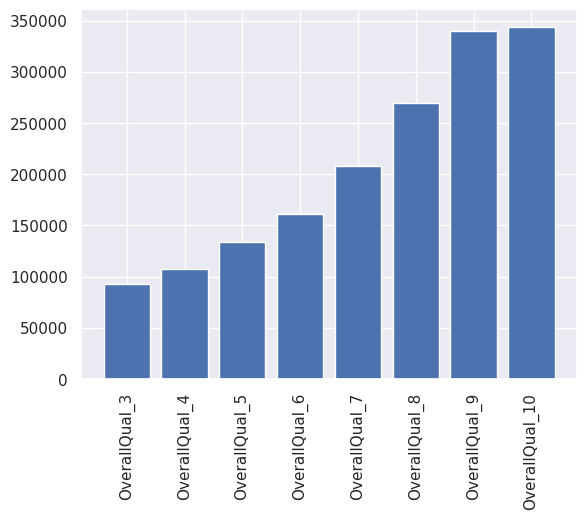

In [25]:
plt.bar(X.columns, modelo2.coef_+modelo2.intercept_)
plt.xticks(rotation=90)
plt.show()

## 5.3. Los distintos tipos de modelos

Existe una infinidad de modelos. Sin embargo, podemos clasificarlos en tres grandes grupos de acuerdo al siguiente diagrama:

<p align="left">
  <img src="https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning1-1.png" alt="" style="background-color:white"  width="1000"/> <br>
</p>

Tomado de: [Abdul Rahid](https://www.slideshare.net/awahid/big-data-and-machine-learning-for-businesses).


En general, un proyecto en ciencia de datos sigue el siguiente flujo:

1. Definir el problema y mirar el panorama general.
2. Obtener los datos.
3. Explorar los datos para obtener información general y estadística descriptiva.
4. Preparación y limpieza de los datos.  
    4.1. Separación de los datos en entrenamiento y prueba (cross-validation).
5. Exploración y selección de modelos.
6. Afinar los modelos (hiperparámetros).
7. Interpretación del modelo.
8. Presentación de la solución.
9. Desplegar, monitorear y mantener el sistema.


## 5.4. Aprendizaje supervisado

Los modelos de aprendizaje supervisado son aquellos que utilizan datos etiquetados para entrenar el modelo. En otras palabras, el modelo aprende a partir de casos en los cuales tenemos las variables independientes (x) y también tenemos las variables (y). Por ejemplo, si queremos entrenar un modelo para que reconozca imágenes de perros, necesitamos tener un set de datos de imágenes de perros etiquetadas como perros y otro set de datos de imágenes de gatos etiquetadas como gatos. De ésta forma, el modelo aprende a reconocer las imágenes de perros y gatos.

Es similar a tener un profesor que nos dice si lo que estamos haciendo está bien o mal. Por ejemplo, si estamos aprendiendo a sumar, el profesor nos dice si la suma que hicimos está bien o mal. De ésta forma, aprendemos a sumar.

> ¿Qué tipo de modelos de aprendizaje supervisado conocen?

<p align="left">
  <img src="https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_12.jpg" alt="" style="background-color:white"  width="1000"/> <br>
</p>

Tomado de: [Analyst Prep](https://analystprep.com/study-notes/cfa-level-2/quantitative-method/supervised-machine-learning-unsupervised-machine-learning-deep-learning/).

### 5.4.1. Modelos de regresión

Un modelo de regresión es un modelo que busca predecir un valor numérico (variable continua). Por ejemplo, el precio de una vivienda, el precio de una acción, la cantidad de ventas de un producto, etc.

### 5.4.2. Modelos de clasificación

Un modelo de clasificación es un modelo que busca predecir una clase (variable categórica). Por ejemplo, si una imagen es un perro o un gato, si un correo electrónico es spam o no, si un tumor es benigno o maligno, si una hogar es pobre o no, etc.

### 5.4.3. Árboles de decisión y bosques aleatorios

Un árbol de decisión es un modelo de aprendizaje supervisado que utiliza un árbol para predecir una clase (variable categórica) o un valor numérico (variable continua). Un árbol de decisión es un modelo que se puede utilizar tanto para clasificación como para regresión.

<p align="left">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/CART_tree_titanic_survivors.png/800px-CART_tree_titanic_survivors.png" alt="" style="background-color:white"  width="300"/> <br>
</p>

Tomado de: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [26]:
df3 = df.copy()

encoders = {}
for col in cat_vars:
    le = LabelEncoder()
    encoders[col] = le
    df3[col] = le.fit_transform(df[col])
    


In [27]:
# decition tree classifier on OverallQual
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

perdidos = df3.isna().sum()
y = df3['OverallQual']
x = df3[[i for i in df3.columns if i not in ['OverallQual', 'SalePrice'] and perdidos[i] == 0]]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

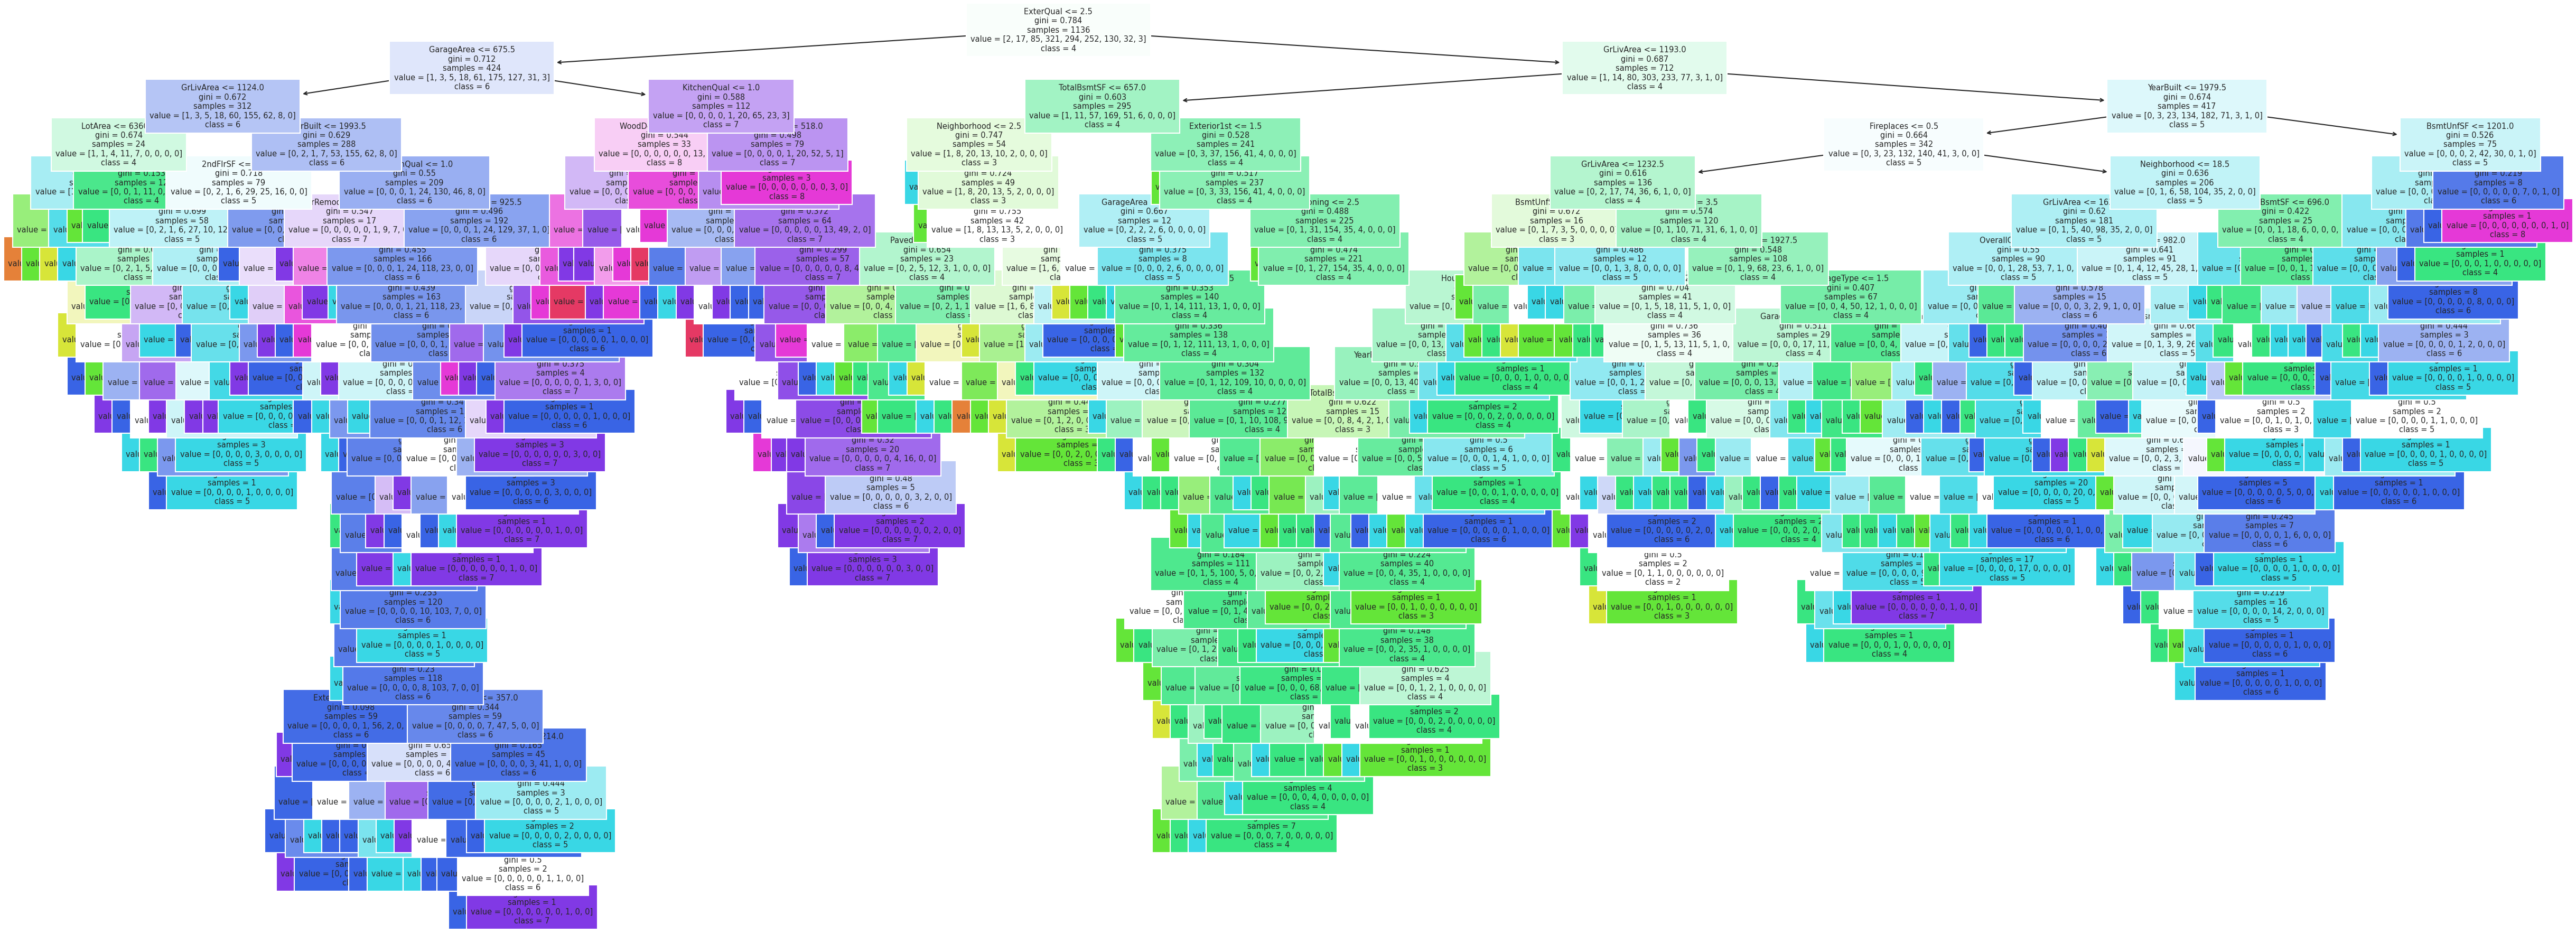

In [30]:
# plot tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(40, 15), dpi=150)
plot_tree(dt, feature_names=x.columns, class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], filled=True, fontsize=7)
plt.show()

In [31]:
# Matríz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dt.predict(X_test)


In [32]:
cmatrix_tc = confusion_matrix(y_test, y_pred)
cmatrix_tc

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  2,  9, 16,  3,  0,  0,  0,  0],
       [ 0,  0, 10, 40, 25,  1,  0,  0,  0],
       [ 0,  0,  5, 17, 44, 10,  3,  0,  0],
       [ 0,  0,  2,  4, 10, 32, 16,  0,  1],
       [ 0,  0,  0,  0,  2,  9, 14,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1]])

In [33]:
lista_acc = []
for i in range(2,150):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    lista_acc.append(acc)

NameError: name 'accuracy_score' is not defined

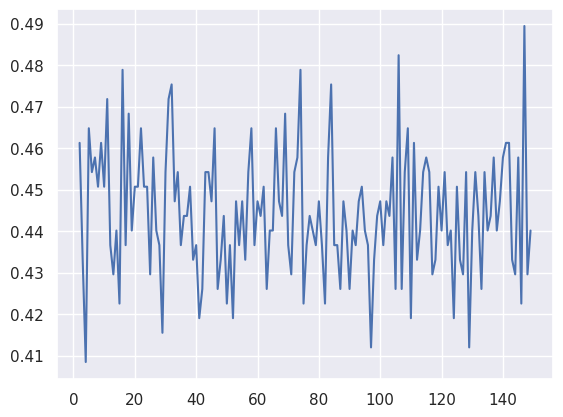

In [ ]:
plt.plot(range(2,150), lista_acc)

Exactitud:  44.72%


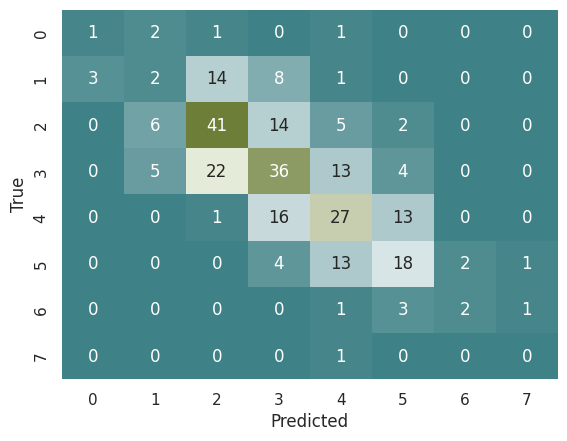

In [ ]:
# Mostrar la matríz de confusión
cmap = sns.diverging_palette(200, 100, as_cmap=True)
sns.heatmap(cmatrix_tc, annot=True, cmap=cmap, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')

# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Exactitud: ', f'{acc:.2%}')

Exactitud:  46.13%


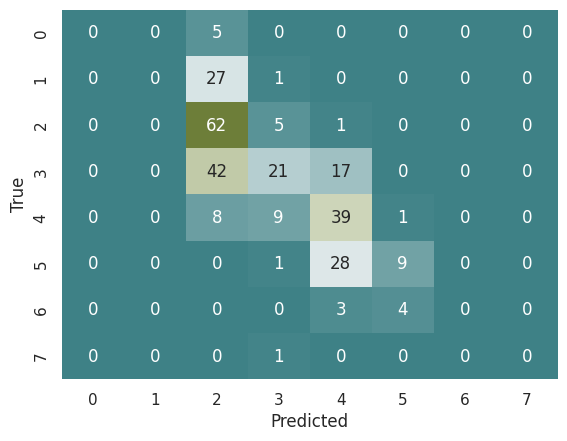

In [ ]:
# Same but with a random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cmatrix_rf = confusion_matrix(y_test, y_pred)

# Mostrar la matríz de confusión
sns.heatmap(cmatrix_rf, annot=True, cmap=cmap, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')


El gráfico se vería de la siguiente forma:
<p align="left">
  <img src="https://i.stack.imgur.com/YR39X.jpg" alt="" style="background-color:white"  width="1000"/> <br>
</p>

Tomado de: [Stack Overflow](https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree).

En este punto, los diagramas se vuelven muy complejos por lo que no siempre es una buena idea graficarlos.

### 5.4.5 Forecast con series de tiempo

Las series de tiempo son un tipo de datos que se caracterizan por tener una secuencia de datos ordenados en el tiempo. Por ejemplo, el precio de una acción, la cantidad de ventas de un producto, la cantidad de visitas a un sitio web, etc.

En ocasiones, es posible predecir el futuro de una serie de tiempo utilizando sus valores en el pasado. A éste proceso se lo conoce como *time series forecast*.

Es un modelo de regresión porque busca predecir un valor numérico (variable continua). Se puede expresar aproximadamente de la siguiente forma:

$$y_{t+1} = f(y_t, y_{t-1}, y_{t-2}, ..., y_1)$$

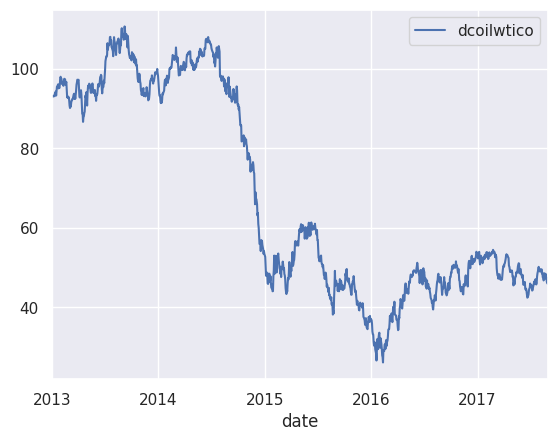

In [89]:
oil = pd.read_csv('https://raw.githubusercontent.com/alejo-acosta/curso-python-ciee/main/data/oil.csv')
oil['date'] = pd.to_datetime(oil['date'])

oil.set_index('date', inplace=True)
oil.interpolate(method='linear', inplace=True)
oil.plot()
plt.show()

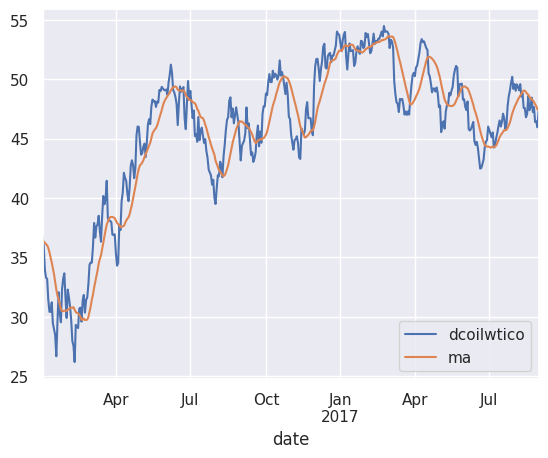

In [105]:
oil = oil[oil.index > '2016-01-01']
oil.plot()
plt.show()

Hay muchas maneras de realizar un *time series forecast*. Una de las más simples es utilizando el método de promedio móvil. El método de promedio móvil es un método que busca predecir el valor de una serie de tiempo utilizando el promedio de los valores anteriores. Por ejemplo, si queremos predecir el valor de una serie de tiempo en el tiempo $t+1$, podemos utilizar el promedio de los valores de la serie de tiempo en los tiempos $t$, $t-1$ y $t-2$.

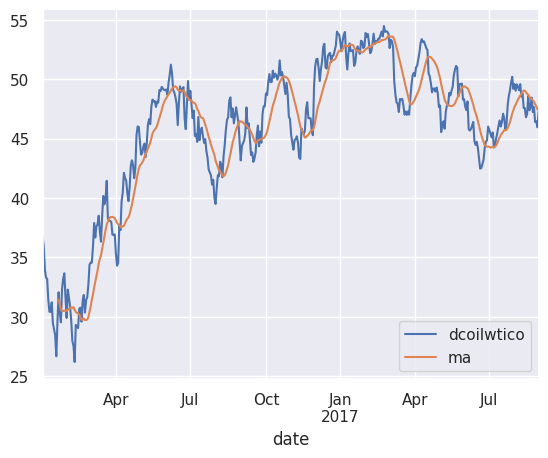

In [106]:
oil['ma'] = oil['dcoilwtico'].rolling(15).mean()
oil.plot()
plt.show()

Éste acercamiento tiene sus limitaciones, ya que no toma en cuenta la tendencia de la serie de tiempo. Por ejemplo, si la serie de tiempo tiene una tendencia creciente, el método de promedio móvil no va a tomar en cuenta ésta tendencia.

Otra forma es usar un modelo autoregresivo. Un modelo autoregresivo es un modelo que busca predecir el valor de una serie de tiempo utilizando los valores anteriores de la misma serie de tiempo. Por ejemplo, si queremos predecir el valor de una serie de tiempo en el tiempo $t+1$, podemos utilizar los valores de la serie de tiempo en los tiempos $t$, $t-1$ y $t-2$.

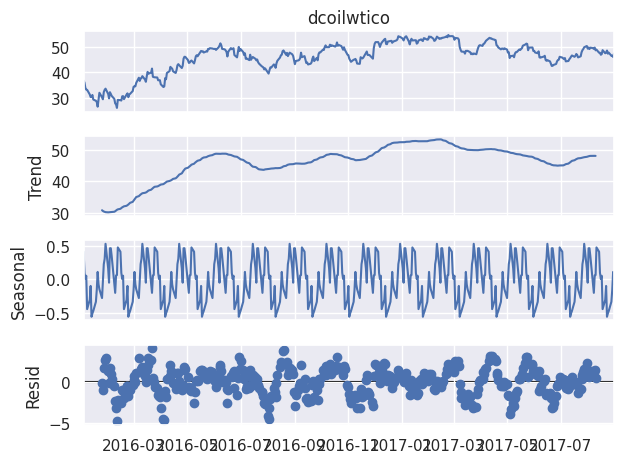

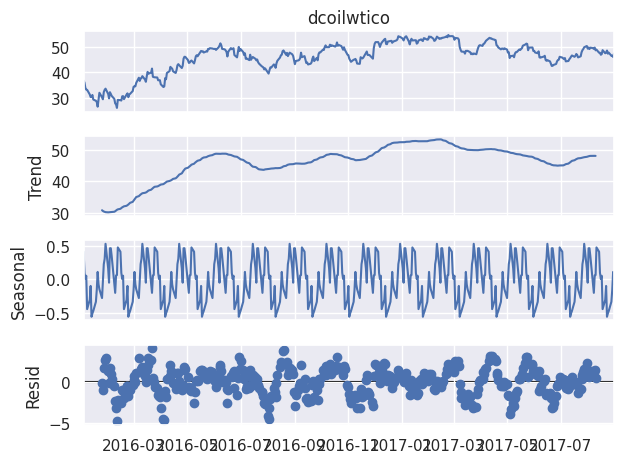

In [107]:
# sarima model on oil
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(oil['dcoilwtico'], model='additive', period=30)
decomposition.plot()


In [111]:
# autoarima forecast
from pmdarima import auto_arima

model = auto_arima(oil['dcoilwtico'], m=2, seasonal=True, trace=True)
model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[2] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[2] intercept   : AIC=1562.537, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[2] intercept   : AIC=1369.532, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[2] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[2]             : AIC=1560.985, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[2] intercept   : AIC=1459.517, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[2] intercept   : AIC=1332.225, Time=0.17 sec
 ARIMA(1,0,0)(2,1,1)[2] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,0)(1,1,1)[2] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(2,1,0)[2] intercept   : AIC=1564.364, Time=0.06 sec
 ARIMA(1,0,1)(2,1,0)[2] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(2,1,0)[2] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,0)(2,1,0)[2]             : AIC=1330.314, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[2]             : AIC=1367.654, Time=0.07 sec
 ARIMA(1,0,0)(2,1,1)[2]             : AIC=inf, Time=0.40 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  434
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 2)   Log Likelihood                -661.157
Date:                           Tue, 23 Jan 2024   AIC                           1330.314
Time:                                   16:38:11   BIC                           1346.588
Sample:                               01-04-2016   HQIC                          1336.739
                                    - 08-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7800      0.033     23.723      0.000       0.716       0.844
ar.S.L2       -0.6860      0.050    -13.793      0.000      -0.784      -0.589
ar.S.L4       -0.3200      0.045     -7.139      0.000      -0.408      -0.232
sigma2         1.2466      0.080     15.566      0.000       1.090       1.404
===================================================================================
Ljung-Box (L1) (Q):                   3.80   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.05   Prob(JB):                         0.15
Heteroskedasticity (H):               0.41   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

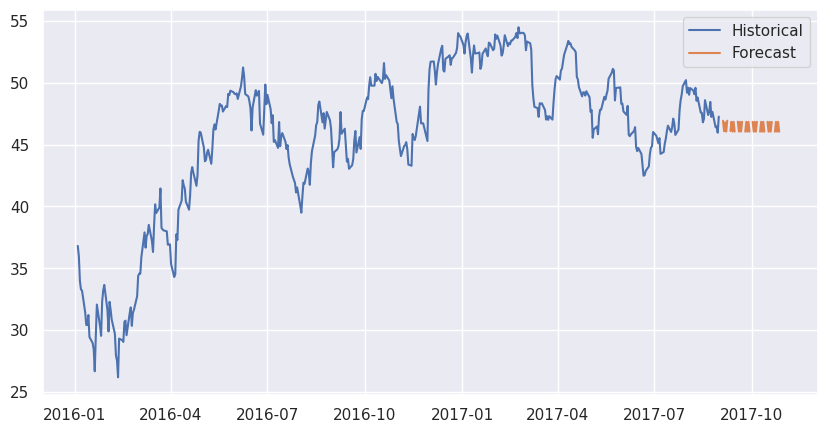

In [118]:
# forecast 60 days and show the time series with the forecast and confidence intervals
forecast, ci = model.predict(n_periods=60, return_conf_int=True)
forecast = pd.DataFrame(forecast, index=pd.date_range(start=oil.index[-1] + pd.Timedelta(days=1), periods=60, freq='D'))
forecast.columns = ['dcoilwtico']
forecast
# Plotting the original data with the forecast
plt.figure(figsize=(10,5))
plt.plot(oil.index, oil['dcoilwtico'], label='Historical')
plt.plot(forecast.index, forecast['dcoilwtico'], label='Forecast')
# plt.fill_between(forecast.index, forecast['dcoilwtico'], color='k', alpha=0.1)
plt.legend()
plt.show()

model.

## 5.5. Aprendizaje no supervisado

El aprendizaje no supervisado es aquel que utiliza datos no etiquetados para entrenar el modelo. En otras palabras, el modelo aprende a partir de casos en los cuales solo tenemos las variables independientes (x) pero no tenemos las variables (y).

### 5.5.1. Clústering

El clustéring es un modelo que busca agrupar los datos en grupos (clústers) de acuerdo a su similitud. Por ejemplo, podemos tener un set de datos de viviendas y queremos agruparlas en grupos de acuerdo a sus características. De ésta forma, podemos tener un grupo de viviendas grandes, un grupo de viviendas pequeñas, un grupo de viviendas con piscina, etc.

### 5.4.2. Reducción dimensional

La reducción dimensional es un modelo que busca reducir la cantidad de variables independientes (x) de un set de datos. Por ejemplo, podemos tener un set de datos de viviendas con 100 variables independientes (x) y queremos reducirlo a 10 variables independientes (x). De ésta forma, podemos reducir la complejidad del modelo y hacerlo más eficiente.